# A Comprehensive Guide to Comparing Multiple Machine Learning Models 

**Introduction:**
The process of comparing multiple Machine Learning (**ML**) models is essential for selecting the most effective algorithm tailored to a specific predictive task. This article delves into the systematic approach of training, evaluating, and analyzing the performance of diverse **ML** algorithms for a **regression** problem using Python.

**Addressing Data Quality:**
Before delving into model comparison, it's crucial to ensure data integrity. This involves addressing missing values, eliminating duplicates, and rectifying errors within the dataset. Maintaining data quality ensures the reliability of model outcomes.

**Data Splitting:**
The dataset is divided into **training** and **testing** sets, typically using a 70-30% or 80-20% split. This partitioning facilitates training the models on one subset and evaluating their performance on another, thereby assessing generalizability.

**Model Selection:**
A pivotal aspect of model comparison is selecting a diverse ensemble of algorithms. This ensemble encompasses simple linear models, tree-based models, ensemble methods, and advanced algorithms. The choice depends on the problem's complexity and the data's intrinsic characteristics.

**Model Fitting:**
Each selected model undergoes training on the **training** data. This process involves adjusting the model's parameters to learn the underlying patterns between features and the target variable present in the training set.

**Performance Evaluation:**
Utilizing a comprehensive set of evaluation metrics, the performance of each model on the **test** set is assessed. Metrics such as Mean Squared Error (**MSE**), Root Mean Squared Error (**RMSE**), Mean Absolute Error (**MAE**), and R-squared are commonly employed to gauge predictive accuracy.

**Model Comparison:**
Upon evaluating the models' performance, a comparative analysis is conducted based on the predefined evaluation metrics. This comparison weighs both the predictive prowess and computational efficiency of each model, aiding in the selection of the optimal algorithm for the given task.

In essence, comparing multiple **ML** models is a systematic process aimed at identifying the algorithm that strikes the optimal balance between accuracy, complexity, and performance. By following the outlined steps and leveraging Python's robust **ML** libraries, practitioners can maximize predictive performance and drive data-driven insights effectively.

In [1]:
import pandas as pd
data = pd.read_csv('C:/Users/anike/OneDrive/Desktop/Projects/Machine Learning/estate/Real_Estate.csv')

# display the first few rows
data_head = data.head()

print(data_head)


             Transaction date  House age  Distance to the nearest MRT station  \
0  2012-09-02 16:42:30.519336       13.3                            4082.0150   
1  2012-09-04 22:52:29.919544       35.5                             274.0144   
2  2012-09-05 01:10:52.349449        1.1                            1978.6710   
3  2012-09-05 13:26:01.189083       22.2                            1055.0670   
4  2012-09-06 08:29:47.910523        8.5                             967.4000   

   Number of convenience stores   Latitude   Longitude  \
0                             8  25.007059  121.561694   
1                             2  25.012148  121.546990   
2                            10  25.003850  121.528336   
3                             5  24.962887  121.482178   
4                             6  25.011037  121.479946   

   House price of unit area  
0                  6.488673  
1                 24.970725  
2                 26.694267  
3                 38.091638  
4             

In [2]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB
None


**Data Preprocessing**

Before diving into model training, it's imperative to preprocess the data to ensure its compatibility with various machine learning algorithms. Below are the essential preprocessing steps we'll undertake:

1. **Converting Transaction Date:**
   Since the transaction date is in a string format, we will convert it into a datetime object. This conversion enables us to extract additional features such as the transaction year and month, which could provide valuable insights for the model.

2. **Scaling Continuous Features:**
   Continuous features need to be scaled to ensure they are on a similar scale. This step is particularly crucial for models such as Support Vector Machines or K-nearest neighbors, which are sensitive to the scale of input features. By scaling the features, we prevent certain features from dominating others merely due to their larger magnitude.

3. **Splitting the Dataset:**
   To evaluate the model's performance effectively, we'll split the dataset into a training set and a testing set. A common practice is to allocate 80% of the data for training and reserve 20% for testing. This segregation allows us to train the model on a subset of the data and then assess its performance on unseen data, thus gauging its generalization capabilities.

By executing these preprocessing steps meticulously, we ensure that our data is adequately prepared for model training, leading to more robust and reliable machine learning outcomes.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import datetime

# convert "Transaction date" to datetime and extract year and month
data['Transaction date'] = pd.to_datetime(data['Transaction date'])
data['Transaction year'] = data['Transaction date'].dt.year
data['Transaction month'] = data['Transaction date'].dt.month

# drop the original "Transaction date" as we've extracted relevant features
data = data.drop(columns=['Transaction date'])

# define features and target variable
X = data.drop('House price of unit area', axis=1)
y = data['House price of unit area']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape

(331, 7)

In [4]:
X_test_scaled.shape

(83, 7)

**Model Training and Comparison**

Having preprocessed our data, we're now poised to embark on the pivotal stage of training multiple models and meticulously comparing their performances. Our objective is to discern the most effective algorithm for our regression task. Let's delve deeper into each model's characteristics and the evaluation metrics we'll employ.

1. **Linear Regression: A Fundamental Baseline**
   
   Linear Regression serves as our fundamental baseline model. It establishes a linear relationship between the input features and the target variable, making it a straightforward yet insightful approach. By fitting a linear equation to the observed data, Linear Regression provides a foundational understanding of how the predictors influence the outcome.

2. **Decision Tree Regressor: Exploring Tree-Based Modeling**

   Introducing Decision Tree Regressor, we delve into the realm of tree-based modeling. Decision trees partition the feature space into distinct regions, facilitating intuitive interpretations. This model allows us to assess how well a simple tree-based approach captures the underlying patterns in the data.

3. **Random Forest Regressor: Harnessing Ensemble Learning**

   Transitioning to ensemble methods, we employ the Random Forest Regressor. By aggregating the predictions of multiple decision trees, Random Forest mitigates overfitting and enhances prediction accuracy. This model's robustness and scalability make it a potent tool for tackling complex regression tasks.

4. **Gradient Boosting Regressor: Unleashing the Power of Boosting**

   Lastly, we harness the formidable power of Gradient Boosting Regressor. Operating on the principle of boosting, this model sequentially builds an ensemble of weak learners, iteratively refining its predictions. Gradient Boosting's ability to adaptively incorporate the strengths of individual models results in exceptional predictive performance.

**Evaluation Metrics: Insights into Model Performance**

In evaluating the models' performance, we employ two pivotal metrics:

- **Mean Absolute Error (MAE):** 
  MAE quantifies the average magnitude of the errors between predicted and actual values. It provides a straightforward measure of prediction accuracy, with lower MAE values indicating closer alignment between predictions and ground truth.

- **R-squared (R²):** 
  R-squared elucidates the proportion of variance in the target variable that is explained by the model. A higher R² value signifies that the model effectively captures a larger portion of the variance, indicative of its predictive prowess.

**Conclusion**

By meticulously training and comparing these diverse models while leveraging comprehensive evaluation metrics, we endeavor to unearth the optimal algorithm for our regression task. Through this rigorous process, we equip ourselves with invaluable insights into the strengths and limitations of each model, empowering us to make informed decisions and drive impactful data-driven solutions.

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# dictionary to hold the evaluation metrics for each model
results = {}

# train and evaluate each model
for name, model in models.items():
    # training the model
    model.fit(X_train_scaled, y_train)

    # making predictions on the test set
    predictions = model.predict(X_test_scaled)

    # calculating evaluation metrics
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # storing the metrics
    results[name] = {"MAE": mae, "R²": r2}

results_df = pd.DataFrame(results).T  # convert the results to a DataFrame for better readability
print(results_df)

                         MAE        R²
Linear Regression   9.748246  0.529615
Decision Tree      11.760342  0.204962
Random Forest       9.887601  0.509547
Gradient Boosting  10.000117  0.476071


In [10]:
from tabulate import tabulate

# Your DataFrame
results_df = pd.DataFrame({
    "MAE": [9.748246, 11.760342, 9.887601, 10.000117],
    "R²": [0.529615, 0.204962, 0.509547, 0.476071]
}, index=["Linear Regression", "Decision Tree", "Random Forest", "Gradient Boosting"])

# Print the DataFrame using tabulate
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid'))


╒═══════════════════╤══════════╤══════════╕
│                   │      MAE │       R² │
╞═══════════════════╪══════════╪══════════╡
│ Linear Regression │  9.74825 │ 0.529615 │
├───────────────────┼──────────┼──────────┤
│ Decision Tree     │ 11.7603  │ 0.204962 │
├───────────────────┼──────────┼──────────┤
│ Random Forest     │  9.8876  │ 0.509547 │
├───────────────────┼──────────┼──────────┤
│ Gradient Boosting │ 10.0001  │ 0.476071 │
╘═══════════════════╧══════════╧══════════╛


Bar Plot - MAE and R²: This is similar to the previous suggestion but using a single bar plot for both MAE and R².

Box Plot - MAE and R²: You can use box plots to visualize the distribution of MAE and R² scores across different models.

Scatter Plot - MAE vs R²: Scatter plots can show the relationship between MAE and R² scores. Each point represents a model, and you can see how the metrics correlate.

Line Plot - MAE and R² over Iterations: If you have multiple iterations or runs for each model, you can plot the trend of MAE and R² over iterations

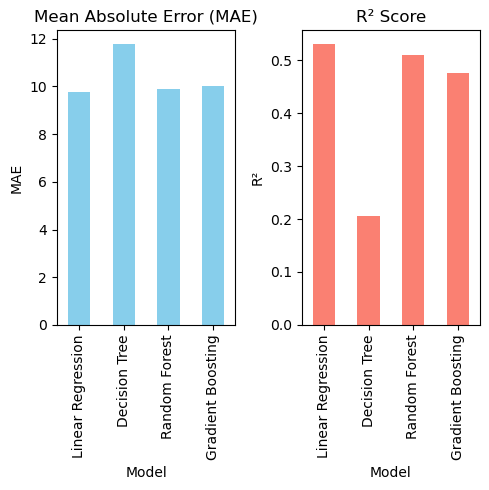

In [9]:
import matplotlib.pyplot as plt

# Plotting MAE
plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1)
results_df['MAE'].plot(kind='bar', color='skyblue')
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')
plt.xlabel('Model')

# Plotting R²
plt.subplot(1, 2, 2)
results_df['R²'].plot(kind='bar', color='salmon')
plt.title('R² Score')
plt.ylabel('R²')
plt.xlabel('Model')

plt.tight_layout()
plt.show()


### Box Plot - MAE and R²:
A box plot is employed to illustrate the distribution of Mean Absolute Error (MAE) and R² scores across different regression models. This type of plot provides insights into the spread, central tendency, and potential outliers within each metric. In this visualization, the left subplot represents the distribution of MAE values, while the right subplot represents the distribution of R² values. The central line in each box denotes the median, while the box itself encompasses the interquartile range (IQR), with whiskers extending to indicate the range of observed values. Box plots are beneficial for detecting variations in performance and identifying potential anomalies within the dataset.

### Scatter Plot - MAE vs R²:
A scatter plot is utilized to explore the relationship between Mean Absolute Error (MAE) and R² scores across different regression models. Each point on the plot corresponds to a specific model, with its position determined by its MAE and R² values. This visualization facilitates the examination of potential correlations or patterns between the two metrics. Additionally, model labels can be included near each point to aid in model identification. Scatter plots are effective for visualizing relationships between continuous variables and are particularly useful for identifying trends or clusters within the data.

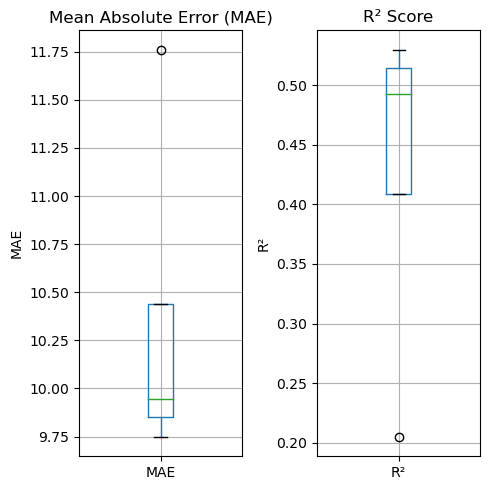

In [17]:
import matplotlib.pyplot as plt

# Your DataFrame
results_df = pd.DataFrame({
    "MAE": [9.748246, 11.760342, 9.887601, 10.000117],
    "R²": [0.529615, 0.204962, 0.509547, 0.476071]
}, index=["Linear Regression", "Decision Tree", "Random Forest", "Gradient Boosting"])

# Box Plot - MAE and R²
plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1)
results_df.boxplot(column='MAE')
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')

plt.subplot(1, 2, 2)
results_df.boxplot(column='R²')
plt.title('R² Score')
plt.ylabel('R²')

plt.tight_layout()
plt.show()


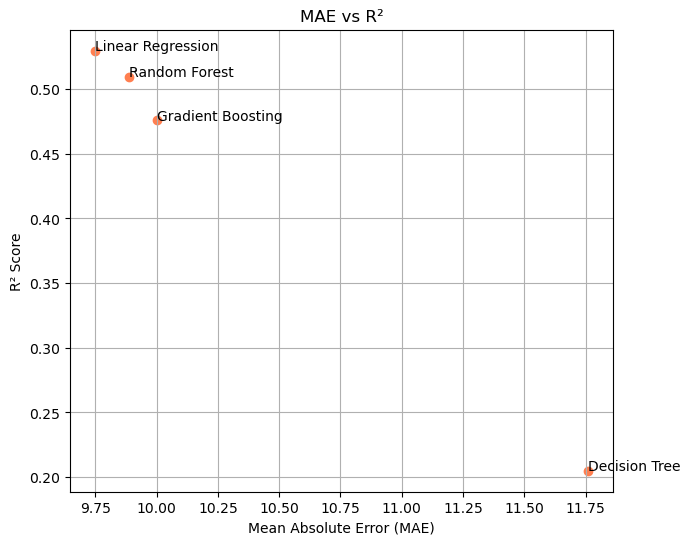

In [19]:
import matplotlib.pyplot as plt

# Your DataFrame
results_df = pd.DataFrame({
    "MAE": [9.748246, 11.760342, 9.887601, 10.000117],
    "R²": [0.529615, 0.204962, 0.509547, 0.476071]
}, index=["Linear Regression", "Decision Tree", "Random Forest", "Gradient Boosting"])

# Scatter Plot - MAE vs R²
plt.figure(figsize=(7, 6))
plt.scatter(results_df['MAE'], results_df['R²'], color='coral')
plt.title('MAE vs R²')
plt.xlabel('Mean Absolute Error (MAE)')
plt.ylabel('R² Score')
for i, txt in enumerate(results_df.index):
    plt.annotate(txt, (results_df['MAE'].iloc[i], results_df['R²'].iloc[i]))
plt.grid(True)
plt.show()


**Compare Multiple Machine Learning Models**

The comparison of multiple Machine Learning models entails training, evaluating, and analyzing the performance of different algorithms on the same dataset to determine the most effective model for a specific predictive task. In this article, we'll guide you through the process of training and comparing multiple Machine Learning models for a regression problem using Python.

**Process We followed**

The process of comparing multiple Machine Learning models involves several key steps:

1. **Data Preprocessing:** Address missing values, remove duplicates, and correct errors in the dataset to ensure data quality.
   
2. **Dataset Splitting:** Divide the dataset into training and testing sets, typically using a 70-30% or 80-20% split, to facilitate model evaluation.

3. **Model Selection:** Choose a diverse set of models for comparison, including linear models, tree-based models, ensemble methods, and more advanced algorithms, depending on the problem's complexity and data characteristics.

4. **Model Training:** Fit each selected model to the training data, adjusting the model to learn from the features and the target variable in the training set.

5. **Performance Evaluation:** Utilize a set of metrics to evaluate each model's performance on the test set, such as Mean Absolute Error (MAE) and R-squared (R²), to assess prediction accuracy and model fit.

6. **Model Comparison:** Compare the models based on the evaluation metrics, considering both their performance and computational efficiency, to identify the most effective algorithm for the specific predictive task.

**Train and Compare Multiple Machine Learning Models**

Let's dive into the practical implementation of training and comparing multiple Machine Learning models using Python. We'll start by importing the necessary Python libraries and the dataset, preprocess the data, and then select regression models for comparison.

**Data Preprocessing:**

We begin by preprocessing the data, which involves converting the transaction date into a datetime object, scaling continuous features to ensure uniformity, and splitting the dataset into training and testing sets.

**Model Training and Comparison:**

We then proceed with training multiple regression models, including Linear Regression, Decision Tree Regressor, Random Forest Regressor, and Gradient Boosting Regressor. Each model is trained using the training data, and its performance is evaluated on the test set using MAE and R² as metrics.

**Results and Summary:**

After evaluating the models, we compare their performance based on the evaluation metrics. Linear Regression emerges as the best-performing model, exhibiting the lowest MAE and the highest R² among the models evaluated. Decision Tree Regressor shows signs of overfitting, while Random Forest Regressor and Gradient Boosting Regressor perform moderately well.

In conclusion, by comparing multiple Machine Learning models, we aim to identify the most effective algorithm that strikes a balance between accuracy, complexity, and performance for the specific regression task at hand. Through meticulous evaluation and comparison, we can make informed decisions and drive impactful data-driven solutions.


In this article, we've elucidated the process of comparing multiple Machine Learning models for a regression problem. By following a systematic approach to data preprocessing, model training, and performance evaluation, we can effectively identify the optimal algorithm for the given predictive task. Through practical implementation in Python, we've demonstrated how to select and compare regression models using real-world data, empowering data scientists and practitioners to make informed decisions and drive impactful outcomes in predictive analytics.